Alpha -10
train RMSE: 119662.16154608905
train R2 0.9596427474343802
test RMSE: 246239.39492141476
test R2 0.7275983828230363


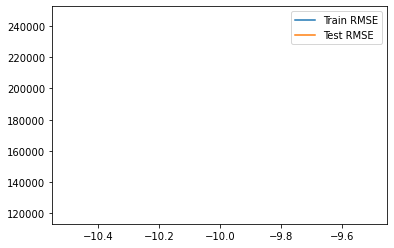

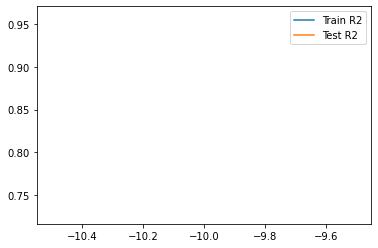

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

df_weekly = pd.read_csv('6_mo_weekly.csv', sep='\t')

train = df_weekly[df_weekly['Date'] <= '2020-10-15']
train = train.drop(['Date', 'Release', 'Y', 'Unnamed: 0'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df_weekly[df_weekly['Date'] > '2020-10-15']
test = test.drop(['Date', 'Release', 'Y', 'Unnamed: 0'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

        
#scaler = StandardScaler()
#train_t = scaler.fit_transform(X_train)
#val_t = scaler.transform(X_test)

#X_train = pd.DataFrame(train_t)
#X_test = pd.DataFrame(val_t)


train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

alphas = [-10] #[2**k for k in range(-10,10)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
#    print('intercept:',linreg.intercept_)
#    print('theta:',linreg.coef_)
        
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_rmse))
    print('train R2', train_r2)
    print('test RMSE:',(test_rmse))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)

    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list, label='Train RMSE')
plt.plot(alphas, test_rmse_list, label='Test RMSE')
plt.legend()
plt.show()
plt.plot(alphas, train_r2_list, label='Train R2')
plt.plot(alphas, test_r2_list, label='Test R2')
plt.legend()
plt.show()

In [254]:
df = pd.read_csv('1_year_weekly.csv', sep='\t')

,Release,Date,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
0,The Fighting Preacher,2019-12-02,197.0,-436.8,813.0,0.004805,45.285714,44.857143,439.0,197.0,-436.8,1.714286,37.142857,8.180209e+05,2019-12-09,145.0
1,Ford v Ferrari,2019-12-02,182.9,-338.7,129.0,2.472222,3.428571,3.714286,9447970.0,182.9,-338.7,3141.857143,364.571429,7.405716e+07,2019-12-09,6957054.0
2,Dark Waters,2019-12-02,2583.5,2311.6,87.0,4.126984,10.857143,12.857143,4168500.0,2583.5,2311.6,902.571429,545.142857,2.188831e+06,2019-12-09,3605800.0
3,Promare,2019-12-02,0.0,0.0,83.0,1.176471,1.428571,0.000000,525543.0,0.0,0.0,87.428571,122.571429,2.777394e+05,2019-12-09,329380.0
4,Once Upon a Time... In Hollywood,2019-12-02,118.8,-178.4,801.0,0.034070,31.000000,30.142857,27109.0,118.8,-178.4,46.714286,73.571429,1.208696e+08,2019-12-09,19063.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,The New Mutants,2020-11-30,-92.9,-269.7,386.0,0.000000,7.000000,8.142857,2128.0,-92.9,-269.7,22.857143,7.285714,1.361620e+07,2020-12-07,0.0
1551,Stardust,2020-11-30,-42.2,-88.9,30.0,0.000000,7.285714,8.571429,1749.0,-42.2,-88.9,25.142857,5.285714,4.037571e+03,2020-12-07,0.0
1552,Embattled,2020-11-30,209.0,-262.6,50.0,0.000000,8.428571,9.714286,1197.0,209.0,-262.6,26.285714,3.428571,1.517814e+04,2020-12-07,0.0
1553,Let Him Go,2020-11-30,-45.0,-250.5,106.0,0.000000,1.714286,1.857143,109275.0,-45.0,-250.5,1089.714286,7.857143,5.014729e+06,2020-12-07,0.0


In [243]:
#linreg.predict(df.drop(['Release', 'Date', 'Y', 'Week + 1', ], axis=1))
linreg.predict([df.drop(['Release', 'Date', 'Y', 'Week + 1'], axis=1).iloc[-1]])

array([113816.44683073])

In [49]:
import plotly.graph_objects as go
import pandas as pd
from datetime import timedelta
import dash
import dash_core_components as dcc
import dash_html_components as html
import numpy as np
import plotly.graph_objects as go
from database import fetch_all_bpa_as_df


COLORS = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
def static_stacked_trend_graph(stack=False):
    """
    Returns scatter line plot of all power sources and power load.
    If `stack` is `True`, the 4 power sources are stacked together to show the overall power
    production.
    """
    i=0
    df = pd.read_csv('2_mo_weekly.csv', sep='\t')
    df['Date_dt'] = df['Date'].astype('datetime64[ns]')
    date = df['Date_dt'].iloc[-1]
    #movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:4]
    
    df_test = df.groupby('Release').filter(lambda x : x['Release'].shape[0]>=2)
    movie_list = df_test[df_test['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release']

    df = df[df['Release'] == movie_list.iloc[i]]
    if df is None:
        return go.Figure()
    
    x = df['Date_dt'] 
    
    predict_date = df['Date_dt'].iloc[-1]  + timedelta(days=7)
    
    y_pred = linreg.predict([df.drop(['Release', 'Date', 'Y', 'Week + 1', 'Date_dt'], axis=1).iloc[-1]])
    trends = df['google trends']/np.sum(df['google trends'])
    rev = df['Weekly']/np.sum(df['Weekly'])
    
    fig = go.Figure()
    
    print(predict_date, y_pred)
    
    fig.add_trace(go.Scatter(x=x, y=df['Weekly'], mode='lines', name='Gross',
                             line={'width': 2, 'color': 'orange'},
                             stackgroup='stack' if stack else None))
    fig.add_trace(go.Scatter(x=[predict_date], y=y_pred, mode='markers', name='Google Trends',
                             line={'width': 2, 'color': 'red'},
                             stackgroup='stack' if stack else None))
    fig.update_layout(yaxis=dict(range=[0, 1.2*df['Weekly'].max()]), xaxis=dict(range=[x.iloc[0], predict_date+timedelta(days=1)]))

    title = f'Weekly Revenue and Trends for {movie_list.iloc[i]}'
    if stack:
        title += ' [Stacked]'
    fig.update_layout(template='plotly_dark',
                      title=title,
                      plot_bgcolor='#23272c',
                      paper_bgcolor='#23272c',
                      yaxis_title='Normalized Rev and Trends',
                      xaxis_title='Date/Time')
    return fig
static_stacked_trend_graph()

2020-12-07 00:00:00 [3691985.95374302]


In [401]:
#df_test = df[df['Date_dt'] == date]['Release'].sort_values(by=['Weekly'], ascending=False)['Release']
#df.groupby('Release').agg('count')['Date']
df_test = df.groupby('Release').filter(lambda x : x['Release'].shape[0]>=2)
movie_list = df_test[df_test['Date_dt'] == date]['Release'].sort_values(by=['Weekly'], ascending=False)['Release']

TypeError: sort_values() got an unexpected keyword argument 'by'

In [328]:
df['Release'].tolist()

['The Fighting Preacher',
 'Ford v Ferrari',
 'Dark Waters',
 'Promare',
 'Once Upon a Time... In Hollywood',
 'Linda Ronstadt: The Sound of My Voice',
 'The Lighthouse',
 'Toy Story 4',
 'Countdown',
 'Last Christmas',
 'Frozen II',
 'The Addams Family',
 'Motherless Brooklyn',
 'Overcomer',
 'Knives Out',
 'Black and Blue',
 'Making Waves: The Art of Cinematic Sound',
 'Doctor Sleep',
 'Abominable',
 'Maleficent: Mistress of Evil',
 'Mr. KleinRe-release',
 'Arctic Dogs',
 "Charlie's Angels",
 'Midway',
 'Portrait of a Lady on Fire',
 'The Star2019 Re-release',
 'Midnight Family',
 'Waves',
 'No Safe Spaces',
 'Meet Me in St. Louis75th Anniversary',
 'The Perfect Race',
 'Matthias & Maxime',
 'The Peanut Butter Falcon',
 'Terminator: Dark Fate',
 'Ad Astra',
 'The Lion King',
 'The Whistleblower',
 'Panipat',
 'Queen & Slim',
 'Downton Abbey',
 'Zombieland: Double Tap',
 'White Snake',
 'When Harry Met Sally...30th Anniversary',
 'Western Stars',
 'Gemini Man',
 'Joker',
 'Playing wit

In [309]:
df = pd.read_csv('1_year_weekly.csv', sep='\t')
df['Date_dt'] = df['Date'].astype('datetime64[ns]')
date = df['Date_dt'].iloc[-1]

movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:5]
#movie = movie_list.iloc[0]
for movie in movie_list:
    date = df['Date_dt'].iloc[-1]
   # print(movie, date)
    trend = df[(df['Release'] == movie) & (df['Date_dt'] == date)]['google trends'].iloc[0]
    rev = df[(df['Release'] == movie) & (df['Date_dt'] == date)]['Weekly'].iloc[0]

    print(trend, rev)

0.0 1625955.0
0.0 238585.0
0.0 109275.0
0.0 98917.0
0.0 90832.0


In [38]:
import plotly.graph_objects as go
import pandas as pd
from datetime import timedelta


COLORS = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
def static_stacked_trend_graph(stack=False):
    """
    Returns scatter line plot of all power sources and power load.
    If `stack` is `True`, the 4 power sources are stacked together to show the overall power
    production.
    """
    i=1
    df = pd.read_csv('1_year_weekly.csv', sep='\t')
    df['Date_dt'] = df['Date'].astype('datetime64[ns]')
    date = df['Date_dt'].iloc[-1]
    movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:10]
    
    df = df[df['Release'] == movie_list.iloc[i]]
    if df is None:
        return go.Figure()
    
    #x = df['Date_dt'] 
    #predict_date = df['Date_dt'].iloc[-1]  + timedelta(days=7)
    
    #linreg.predict(df.iloc[-1])
    
    
    df = pd.read_csv('6_mo_weekly.csv', sep='\t')
    df['Date_dt'] = df['Date'].astype('datetime64[ns]')
    date = df['Date_dt'].iloc[-1]

    
    fig = go.Figure()
    movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:20]
    #movie = movie_list.iloc[0]
    for movie in movie_list:
        date = df['Date_dt'].iloc[-1]
       # print(movie, date)
        trend = df[(df['Release'] == movie) & (df['Date_dt'] == date)]['google trends'].iloc[0]
        rev = df[(df['Release'] == movie) & (df['Date_dt'] == date)]['Weekly'].iloc[0]
        fig.add_trace(go.Scatter(x=[trend], y=[rev], mode='markers', name=movie,
                         line={'width': 2, 'color': 'orange'},
                         stackgroup='stack' if stack else None))
        print(trend, rev)
    
    title = f'Revenue and trends'
    if stack:
        title += ' [Stacked]'
    fig.update_layout(template='plotly_dark',
                      title=title,
                      plot_bgcolor='#23272c',
                      paper_bgcolor='#23272c',
                      yaxis_title='MW',
                      xaxis_title='Date/Time')
    return fig
static_stacked_trend_graph()

19.84126984126985 2053090.0
6.349206349206351 1110540.0
3.014084507042253 973453.0
18.095238095238102 777275.0
5.526315789473684 642302.0
0.0 461000.0
19.463340891912328 380428.0
0.19 237863.0
1.72 225691.0
0.0 200000.0
0.0 180000.0
1.2 161016.0
1.46 150497.0
0.0 136000.0
0.07032479999999999 103393.0
16.23791278963693 73449.0
6.867924528301888 59472.0
1.3333333333333337 44281.0
2.263157894736842 37442.0
1.7254901960784312 23383.0


In [64]:
import plotly.graph_objects as go
import pandas as pd
from datetime import timedelta


COLORS = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
c = ['red', 'blue', 'orange', 'white']
def static_stacked_trend_graph(stack=False):
    """
    Returns scatter line plot of all power sources and power load.
    If `stack` is `True`, the 4 power sources are stacked together to show the overall power
    production.
    """
    trends = []
    revenues = []
    
    stack=False
    df = pd.read_csv('3_mo_weekly.csv', sep='\t')
    df['Date_dt'] = df['Date'].astype('datetime64[ns]')
    date = df['Date_dt'].iloc[-1]
    if df is None:
        return go.Figure()
    
    fig = go.Figure()
    movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:20]
    for row in range(df.shape[0]):
        date = df['Date_dt'].iloc[-1]
        trend = df.iloc[row]['google trends']
        if trend > 40:
            continue
        rev = df.iloc[row]['Weekly']
        if trend > 1 and rev <1e6:
            continue
        if trend == 0:
            continue
        trends.append(trend)
        revenues.append(rev)
        fig.add_trace(go.Scatter(x=[trend], y=[rev], mode='markers', name=df.iloc[row]["Release"],
                         line={'width': 2, 'color': c[row%4]},
                         stackgroup='stack' if stack else None))
    trends, revenues = pd.Series(trends), pd.Series(revenues)
    corr = trends.corr(revenues)
    
    title = f'Google Trends vs Weekly Gross: Correlation = {corr}'
    if stack:
        title += ' [Stacked]'
    fig.update_layout(template='plotly_dark',
                      title=title,
                      plot_bgcolor='#23272c',
                      paper_bgcolor='#23272c',
                      yaxis_title='Weekly Gross',
                      xaxis_title='Google Trend')
    return fig
static_stacked_trend_graph()

In [47]:
import plotly.graph_objects as go
import pandas as pd
from datetime import timedelta


COLORS = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
c = ['red', 'blue', 'orange', 'white']
def static_stacked_trend_graph(stack=False):
    """
    Returns scatter line plot of all power sources and power load.
    If `stack` is `True`, the 4 power sources are stacked together to show the overall power
    production.
    """
    trends = []
    revenues = []
    
    stack=False
    df = pd.read_csv('2_mo_weekly.csv', sep='\t')
    df['Date_dt'] = df['Date'].astype('datetime64[ns]')
    date = df['Date_dt'].iloc[-1]
    if df is None:
        return go.Figure()
    
    fig = go.Figure()
    movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:20]
    for row in range(df.shape[0]):
        date = df['Date_dt'].iloc[-1]
        trend = df.iloc[row]['Weekly']
        #if trend > 40:
        #    continue
        rev = df.iloc[row]['Week + 1']
        #if trend > 1 and rev <1e6:
        #    continue
        #if trend == 0:
        #    continue
        trends.append(trend)
        revenues.append(rev)
        fig.add_trace(go.Scatter(x=[trend], y=[rev], mode='markers', name=df.iloc[row]["Release"],
                         line={'width': 2, 'color': c[row%4]},
                         stackgroup='stack' if stack else None))
    trends, revenues = pd.Series(trends), pd.Series(revenues)
    corr = trends.corr(revenues)
    
    title = f'Weekly vs Week + 1: Correlation = {corr}'
    if stack:
        title += ' [Stacked]'
    fig.update_layout(template='plotly_dark',
                      title=title,
                      plot_bgcolor='#23272c',
                      paper_bgcolor='#23272c',
                      yaxis_title='Weekly Gross',
                      xaxis_title='Week + 1')
    return fig
static_stacked_trend_graph()

In [25]:
df = pd.read_csv('6_mo_weekly.csv', sep='\t')

2020-05-18T00:00:00.000000000
0.9139008797228658


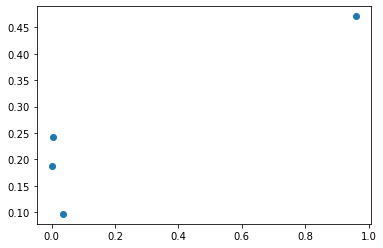

2020-05-25T00:00:00.000000000
0.05583579376613875


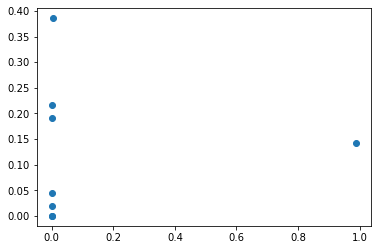

2020-06-01T00:00:00.000000000
0.5246400426304917


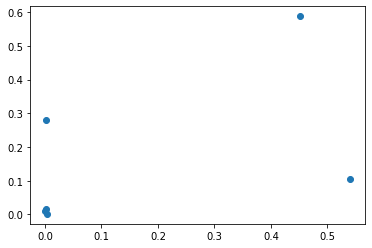

2020-06-08T00:00:00.000000000
0.6741417260390874


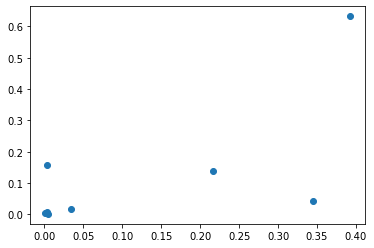

2020-06-15T00:00:00.000000000
0.5576583562034678


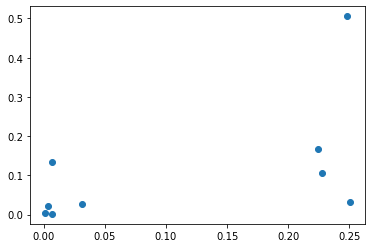

2020-06-22T00:00:00.000000000
0.8068127320314725


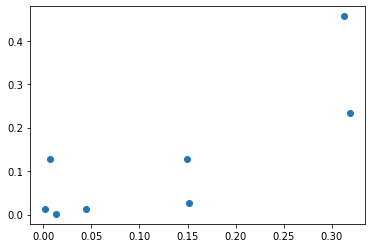

2020-06-29T00:00:00.000000000
0.13820409495149452


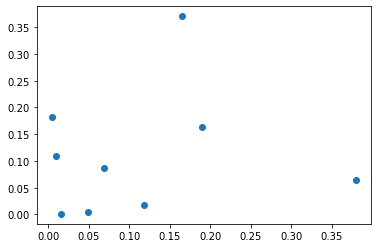

2020-07-06T00:00:00.000000000
0.3371114911256263


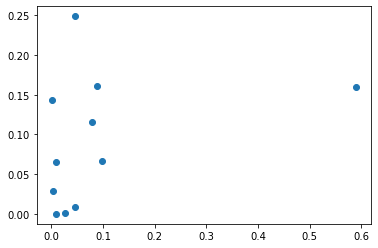

2020-07-13T00:00:00.000000000
0.4263643122298629


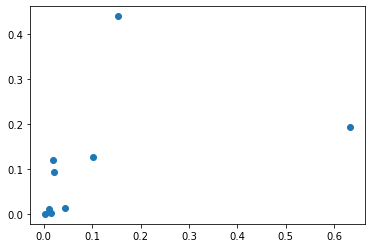

2020-07-20T00:00:00.000000000
0.28094000021223653


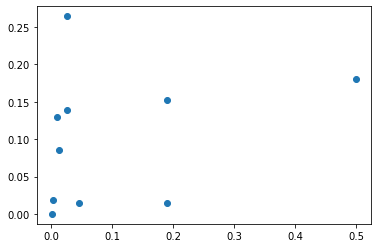

2020-07-27T00:00:00.000000000
0.6842042216876978


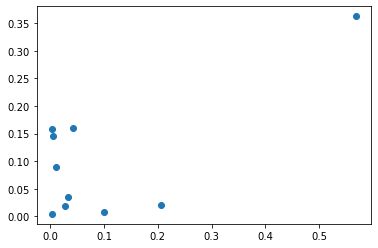

2020-08-03T00:00:00.000000000
0.5263731850647377


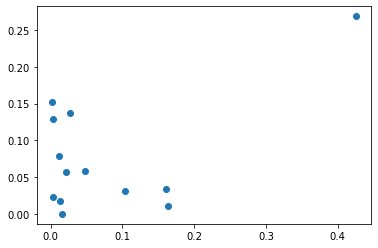

2020-08-10T00:00:00.000000000
-0.15629269136714063


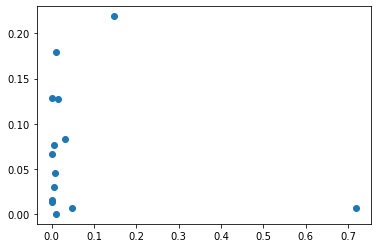

2020-08-17T00:00:00.000000000
-0.04217635912211615


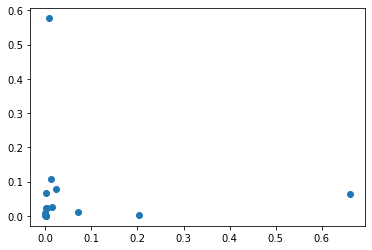

2020-08-24T00:00:00.000000000
-0.10724166202797121


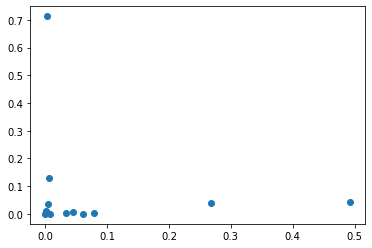

2020-08-31T00:00:00.000000000
-0.11842111834828156


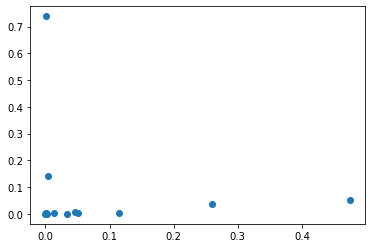

2020-09-07T00:00:00.000000000
0.17852771826992106


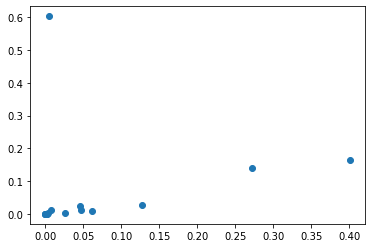

2020-09-14T00:00:00.000000000
-0.027575397251530707


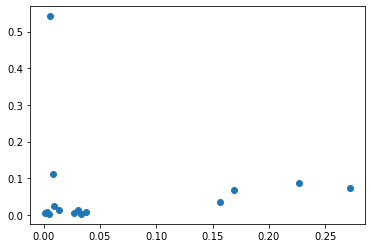

2020-09-21T00:00:00.000000000
0.08507693255318702


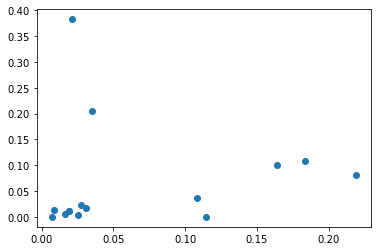

2020-09-28T00:00:00.000000000
-0.20257188635280643


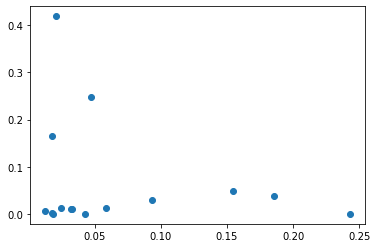

2020-10-05T00:00:00.000000000
-0.1203153858713787


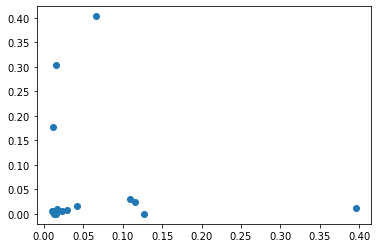

2020-10-12T00:00:00.000000000
-0.236894020775502


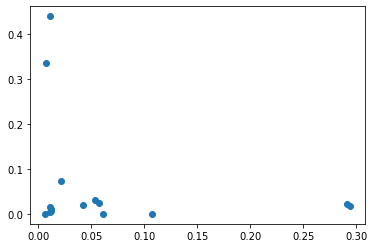

2020-10-19T00:00:00.000000000
-0.22335680734151273


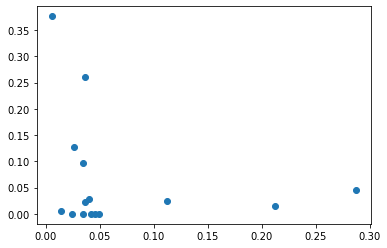

2020-10-26T00:00:00.000000000
-0.10103889042522249


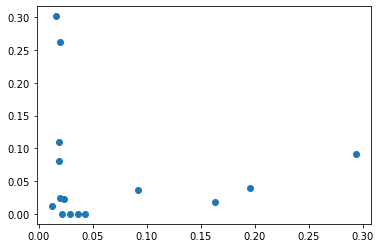

2020-11-02T00:00:00.000000000
-0.17440327158493632


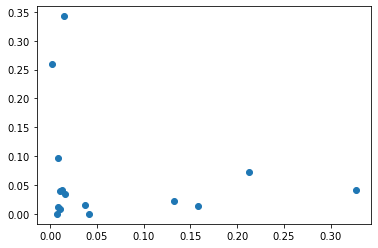

2020-11-09T00:00:00.000000000
0.6157964918850519


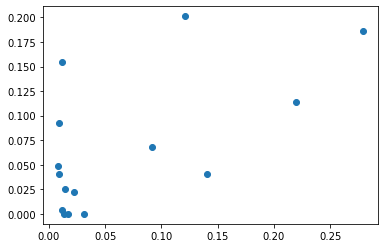

2020-11-16T00:00:00.000000000
0.6524839910251948


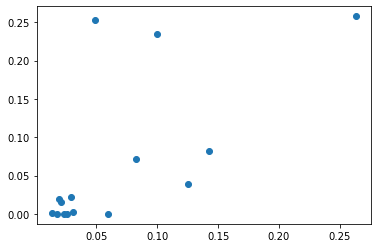

In [71]:
import plotly.graph_objects as go

df = pd.read_csv('6_mo_weekly.csv', sep='\t')
df['Date_dt'] = df['Date'].astype('datetime64[ns]')

for i in range(len(df['Date_dt'].unique())):
    date = df['Date_dt'].unique()[i]  #.iloc[-10]
    
    print(date)

    fig = go.Figure()
    sorted_df = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)[0:15][::-1]
    y = sorted_df['Release']
    x_rev = sorted_df['Weekly'] / np.sum(sorted_df['Weekly'])
    x_trend = sorted_df['google trends'] / np.sum(sorted_df['google trends'])
    trends, revenues = pd.Series(x_trend), pd.Series(x_rev)
    corr = trends.corr(revenues)
    print(corr)
    plt.scatter(x_rev, x_trend)
    plt.show()
    continue
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        y=y,
        x=x_rev,
        name='Gross',
        orientation='h',
        marker=dict(
            color='blue', #rgba(246, 78, 139, 0.6)',
            line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
        )
    ))
    fig.add_trace(go.Bar(
        y=y,
        x=x_trend,
        name='Google Trends',
        orientation='h',
        marker=dict(
            color='red', #rgba(58, 71, 80, 0.6)',
            line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
        )
    ))
    title = f'Normalized Gross and Google Trends for top 15 Movies: Correlation = {corr}'

    #fig.update_layout(barmode='stack')
    fig.update_layout(template='plotly_dark',
                      title=title,
                      plot_bgcolor='#23272c',
                      paper_bgcolor='#23272c',
                      yaxis_title='Movies',
                      xaxis_title='Normalized Quantities',barmode='stack')


    #fig.show()

In [65]:
import plotly.graph_objects as go

df = pd.read_csv('6_mo_weekly.csv', sep='\t')
df['Date_dt'] = df['Date'].astype('datetime64[ns]')

date = df['Date_dt'].unique()[5]#.iloc[-10]
print(date)

fig = go.Figure()
sorted_df = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)[0:15][::-1]
y = sorted_df['Release']
x_rev = sorted_df['Weekly'] / np.sum(sorted_df['Weekly'])
x_trend = sorted_df['google trends'] / np.sum(sorted_df['google trends'])
trends, revenues = pd.Series(x_trend), pd.Series(x_rev)
corr = trends.corr(revenues)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=y,
    x=x_rev,
    name='Gross',
    orientation='h',
    marker=dict(
        color='blue', #rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=y,
    x=x_trend,
    name='Google Trends',
    orientation='h',
    marker=dict(
        color='red', #rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))
title = f'Normalized Gross and Google Trends for top 15 Movies: Correlation = {corr}'

#fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_dark',
                  title=title,
                  plot_bgcolor='#23272c',
                  paper_bgcolor='#23272c',
                  yaxis_title='Movies',
                  xaxis_title='Normalized Quantities',barmode='stack')


#fig.show()

2020-06-22T00:00:00.000000000


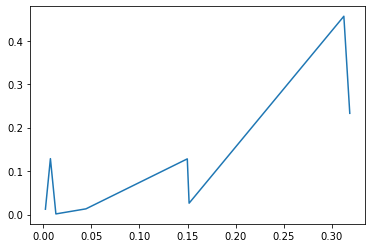

In [69]:
from matplotlib import pyplot as plt

plt.plot(x_rev, x_trend)

In [105]:
df['Date_dt'] = df['Date'].astype('datetime64[ns]')
date = df['Date_dt'].iloc[-1]
movie_list = df[df['Date_dt'] == date].sort_values(by=['Weekly'], ascending=False)['Release'][0:4]
movie_list.iloc[1]

'Freaky'

In [13]:
import datetime
def test_date():
    d1 = datetime.date.today() - timedelta(days=1)
    print(d1)
def test_test_date():
    test_date()
def test_test_test_date():
    test_test_date()
test_test_test_date()

2020-12-05


In [ ]:
import sched, time
from datetime import date, timedelta, datetime
import pandas as pd
from bs4 import BeautifulSoup
import requests
import gtab
import numpy as np
import datetime

DOWNLOAD_PERIOD = 604800
#DOWNLOAD_PERIOD = 600

def add_target(df_weekly):
    '''Matches a row with the next weeks 'Weekly' columns which is target variable.'''  
    df_temp = pd.read_csv('3_mo_weekly.csv', sep='\t')
    df_weekly = df_temp.append(df_weekly, ignore_index=True)
    df_weekly['Date'] = df_weekly['Date'].astype('datetime64[ns]')
    #from datetime import timedelta
    df_weekly['Y'] = df_weekly['Date'].apply(lambda x: x + timedelta(days=7))
    df_weekly['Week + 1'] = pd.Series(np.zeros(df_weekly.shape[0]))
    for movie in df_weekly['Release'].unique():
        for date in df_weekly[df_weekly['Release'] == movie]['Date']:
            df_weekly.loc[(df_weekly['Release'] == movie) & (df_weekly['Y'] == date), 'Week + 1'] = float(df_weekly.loc[(df_weekly['Release'] == movie) & (df_weekly['Date'] == date)]['Weekly'])
            df_weekly['Week + 1'].fillna(0, inplace=True)
    return df_weekly


def to_weekly(df):
    '''Combines daily into weekly data, divides by 7 where appropriate, removes data points with 'Weekly' == 0'''
        #convert date column into datetime object
    df['Date'] = df['Date'].astype('datetime64[ns]')
    #convert daily data to weekly
    df_weekly = df.groupby("Release").resample('W-Mon', label='left', closed = 'left', on='Date').sum().reset_index().sort_values(by='Date')
    df_weekly['Avg TD'] = df_weekly['TD'].apply(lambda x: x/7)
    df_weekly = df_weekly.drop('TD', axis=1)
    df_weekly['Avg YD'] = df_weekly['YD'].apply(lambda x: x/7)
    df_weekly = df_weekly.drop('YD', axis=1)
    df_weekly['Weekly'] = df_weekly['Daily']  
    df_weekly = df_weekly.drop('Daily', axis=1)
    df_weekly['Weekly %+-YD'] = df_weekly['%+-YD'] 
    df_weekly['Weekly %+-LW'] = df_weekly['%+-LW'] 
    df_weekly['Avg Theatre'] = df_weekly['Theatre'].apply(lambda x: x/7)
    df_weekly = df_weekly.drop('Theatre', axis=1)
    df_weekly['Avg per Theatre Avg'] = df_weekly['Avg'].apply(lambda x: x/7)
    df_weekly = df_weekly.drop('Avg', axis=1)
    df_weekly['Avg To Date'] = df_weekly['To Date'].apply(lambda x: x/7)
    df_weekly = df_weekly.drop('To Date', axis=1)
    df_weekly = df_weekly[df_weekly.Weekly != 0]
    
    return df_weekly
    

def edit_df(df):
    """Removes $,%,- and converts str to int or float"""
    df['Daily'] = df.Daily.apply(lambda x: x.strip('$'))
    df['%+-YD'] = df['%+-YD'].apply(lambda x: x.strip('%'))
    df['%+-LW'] = df['%+-LW'].apply(lambda x: x.strip('%'))
    df['Avg'] = df['Avg'].apply(lambda x: x.strip('$'))
    df['To Date'] = df['To Date'].apply(lambda x: x.strip('$'))
    df['Distributor'] = df.Distributor.apply(lambda x: x[0:-2])

    df = df.replace(',','', regex=True)
    df = df.replace('-', '0') #SHOUOLD BE NAN
    df = df.replace('<0.1', '0')
    
    df['Theatre'] = df['Theatre'].astype(float)
    df['Days'] = df['Days'].astype(float)
    df['Daily'] = df.Daily.astype(float)
    df['%+-YD'] = df['%+-YD'].astype(float)
    df['%+-LW'] = df['%+-LW'].astype(float)
    df['Avg'] = df['Avg'].astype(float)
    df['To Date'] = df['To Date'].astype(float)
    df['TD'] = df['TD'].astype(float)
    df['YD'] = df['YD'].astype(float)
    return df

def google_trends(df, d1, d2):
    """Pulls movie data from google trends and merges"""
    df.loc[:, 'google trends'] = 0
    for movie in df['Release'].unique():
        try:
            t = gtab.GTAB();
            t.set_options(pytrends_config={"timeframe": f"{str(d1)} {str(d2)}"}); 
            query = t.new_query(movie);
            #print(query)
            for date in query.index:
                print(query.loc[date, 'max_ratio'])
                df.loc[df['Release'].eq(movie) & df['Date'].eq(date), 'google trends'] = query.loc[date, 'max_ratio']
        except:
            continue
    return df

def get_data():
    '''Scrapes data from boxofficemojo with beautiful soup'''
    
    d2 = datetime.date.today() - timedelta(days=1)
    d1 = d2 - timedelta(days=6)

    dd = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)][::-1]
    rows = 0
    df = pd.DataFrame(columns = ['Date','TD', 'YD', 'Release', 'Daily', '%+-YD', '%+-LW', 'Theatre', 'Avg', 'To Date', 'Days', 'Distributor'])

    for date in dd:
        try:
            source = requests.get('https://www.boxofficemojo.com/date/'+str(date)+'/').text
            soup = BeautifulSoup(source, 'lxml')
            table = soup.find('table')
            data = table.find_all('tr')
            master_list = []
            for row in data:
                row_list = [date]
                for entry in row.find_all('td'):
                    if entry.text == 'false' or entry.text == 'true':
                        continue
                    row_list.append(entry.text)

                if len(row_list) == 12:
                    master_list.append(row_list)

            for i in range(len(master_list)):
                df.loc[rows] = master_list[i]
                rows += 1
        except:
            continue
            
    df = google_trends(df, d1, d2)
    df = edit_df(df) 
    df_weekly = to_weekly(df)
    df_weekly = add_target(df_weekly)

        
    df_weekly['Date'] = df_weekly['Date'].astype('datetime64[ns]')
    df_weekly.to_csv('3_mo_weekly.csv', index=False, sep='\t')
    print('DONE')
    
    
def main_loop(timeout=DOWNLOAD_PERIOD):
    scheduler = sched.scheduler(time.time, time.sleep)
    

    def _worker():
        try:
            get_data()
        except Exception as e:
            logger.warning("main loop worker ignores exception and continues: {}".format(e))
        scheduler.enter(timeout, 1, _worker)    # schedule the next event

    scheduler.enter(0, 1, _worker)              # start the first event
    scheduler.run(blocking=True)
main_loop()

Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Croods: A New Age'
New query calibrated!
0.123552
0.11232
0.083616
0.097344
0.07113599999999999
0.10982399999999999
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Half Brothers'
New query calibrated!
0.25773195876288657
0.23711340206185566
0.4329896907216495
0.5360824742268041
0.8762886597938144
1.0309278350515463
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_g

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Last Call'
New query calibrated!
1.1235955056179776
1.1123595505617978
0.8202247191011236
1.0224719101123596
0.797752808988764
1.1235955056179776
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Come Away'
New query calibrated!
0.89
0.84
0.78
0.79
0.93
0.78
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Last Vermeer'
New query c

In [2]:
import pandas as pd
pd.read_csv('6_mo_weekly.csv', sep='\t')
#df_weekly  #['Date'].astype('datetime64[ns]')
#MOST RECENT 3_MO

,Release,Date,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
0,The Trip to Greece,2020-05-18,-38.5,0.0,6.0,1.230000,1.142857,0.714286,1110.0,-38.5,0.0,1.285714,52.714286,344.285714,2020-05-25,513.0
1,The Wretched,2020-05-18,378.3,472.3,110.0,2.380000,0.714286,0.714286,246813.0,378.3,472.3,31.285714,730.857143,319966.714286,2020-05-25,254014.0
2,How to Build a Girl,2020-05-18,-127.1,-32.3,75.0,0.490000,1.571429,1.571429,8929.0,-127.1,-32.3,3.857143,177.857143,48072.000000,2020-05-25,332.0
3,First Lady,2020-05-18,0.0,35.7,98.0,0.952381,0.428571,0.000000,19.0,0.0,35.7,0.142857,2.714286,13328.285714,2020-05-25,0.0
4,How to Build a Girl,2020-05-25,93.0,-659.8,147.0,0.520000,3.428571,3.142857,332.0,93.0,-659.8,3.000000,15.285714,68852.428571,2020-06-01,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Elf2020 Re-release,2020-11-16,22.5,33.0,27.0,0.000000,4.428571,3.142857,180000.0,22.5,33.0,111.000000,99.142857,125814.857143,2020-11-23,0.0
498,Counter Column,2020-11-16,-100.0,-240.5,134.0,0.018782,11.714286,12.857143,25.0,-100.0,-240.5,0.571429,3.571429,8863.000000,2020-11-23,0.0
499,Vanguard,2020-11-16,-15.5,0.0,6.0,19.463341,3.000000,2.000000,380428.0,-15.5,0.0,589.285714,39.285714,112981.285714,2020-11-23,0.0
500,The Informer,2020-11-16,-58.2,-457.5,98.0,2.263158,13.857143,13.428571,37442.0,-58.2,-457.5,123.000000,53.714286,270363.714286,2020-11-23,0.0


In [13]:
pd.read_csv('1_year_weekly.csv', sep='\t')

,Release,Date,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
0,The Fighting Preacher,2019-12-02,197.0,-436.8,813.0,0.004805,45.285714,44.857143,439.0,197.0,-436.8,1.714286,37.142857,8.180209e+05,2019-12-09,145.0
1,Ford v Ferrari,2019-12-02,182.9,-338.7,129.0,2.472222,3.428571,3.714286,9447970.0,182.9,-338.7,3141.857143,364.571429,7.405716e+07,2019-12-09,6957054.0
2,Dark Waters,2019-12-02,2583.5,2311.6,87.0,4.126984,10.857143,12.857143,4168500.0,2583.5,2311.6,902.571429,545.142857,2.188831e+06,2019-12-09,3605800.0
3,Promare,2019-12-02,0.0,0.0,83.0,1.176471,1.428571,0.000000,525543.0,0.0,0.0,87.428571,122.571429,2.777394e+05,2019-12-09,329380.0
4,Once Upon a Time... In Hollywood,2019-12-02,118.8,-178.4,801.0,0.034070,31.000000,30.142857,27109.0,118.8,-178.4,46.714286,73.571429,1.208696e+08,2019-12-09,19063.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,The New Mutants,2020-11-30,-92.9,-269.7,386.0,0.000000,7.000000,8.142857,2128.0,-92.9,-269.7,22.857143,7.285714,1.361620e+07,2020-12-07,0.0
1551,Stardust,2020-11-30,-42.2,-88.9,30.0,0.000000,7.285714,8.571429,1749.0,-42.2,-88.9,25.142857,5.285714,4.037571e+03,2020-12-07,0.0
1552,Embattled,2020-11-30,209.0,-262.6,50.0,0.000000,8.428571,9.714286,1197.0,209.0,-262.6,26.285714,3.428571,1.517814e+04,2020-12-07,0.0
1553,Let Him Go,2020-11-30,-45.0,-250.5,106.0,0.000000,1.714286,1.857143,109275.0,-45.0,-250.5,1089.714286,7.857143,5.014729e+06,2020-12-07,0.0


In [2]:
import pandas as pd
pd.read_csv('3_mo_weekly.csv', sep='\t')
#df_weekly[df_weekly['Release'] == 'Let Him Go']

,Release,Date,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
0,Tesla,2020-08-24,-39.4,-185.8,49.0,425.170068,7.857143,7.428571,34098.0,-39.4,-185.8,99.000000,49.571429,6.085743e+04,2020-08-31,4732.0
1,Bill & Ted Face the Music,2020-08-24,-46.5,0.0,6.0,1.860000,1.285714,0.857143,1125007.0,-46.5,0.0,431.571429,159.428571,3.494943e+05,2020-08-31,1142565.0
2,Unhinged,2020-08-24,121.7,-106.2,98.0,22.619048,1.428571,1.285714,3819220.0,121.7,-106.2,2040.714286,254.142857,6.757881e+06,2020-08-31,2598055.0
3,Juvenile Delinquents,2020-08-24,0.0,0.0,354.0,0.000000,3.714286,0.000000,1260.0,0.0,0.0,0.285714,180.000000,9.700571e+03,2020-08-31,0.0
4,Words on Bathroom Walls,2020-08-24,159.3,9.3,49.0,4.040000,3.857143,3.571429,646438.0,159.3,9.3,1125.857143,75.857143,7.227500e+05,2020-08-31,455438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Come Away,2020-11-30,-82.3,-290.1,81.0,0.000000,8.857143,7.000000,1418.0,-82.3,-290.1,150.857143,0.571429,1.046537e+05,2020-12-07,0.0
425,Buddy Games,2020-11-30,-50.1,-370.3,98.0,0.000000,12.285714,12.000000,71914.0,-50.1,-370.3,312.142857,38.142857,3.641001e+05,2020-12-07,0.0
426,All My Life,2020-11-30,-50.0,0.0,6.0,0.000000,2.285714,1.428571,350000.0,-50.0,0.0,415.714286,51.428571,1.100000e+05,2020-12-07,0.0
427,True to the Game 2,2020-11-30,-3.0,-86.6,90.0,0.000000,4.714286,3.142857,83064.0,-3.0,-86.6,76.285714,66.571429,5.037743e+05,2020-12-07,0.0
